[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-04-coffee-store-input)

## 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석하기

* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현해 봅니다..

### 다루는 내용
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기

### 실습
* 텍스트 데이터 정제하기 -  대소문자로 섞여있는 상호명을 소문자로 변경하고 상호명 추출하기
* 텍스트 데이터에서 원하는 정보 추출하기 - 브랜드명 컬럼을 만들고 구별 매장 수 분석하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 choropleth 그리기


### 데이터셋
* https://www.data.go.kr/dataset/15012005/fileData.do
* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5

### 관련기사
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

## 필요한 라이브러리 불러오기

In [1]:
#데이터 분석을 위해 pandas를, 수치 계산을 위해 numpy를, 시각화를 위해 seaborn 부르기
import pandas as pd
import numpy as np
import seaborn as sns
#구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정

In [2]:
#한글폰트 설정
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
#폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

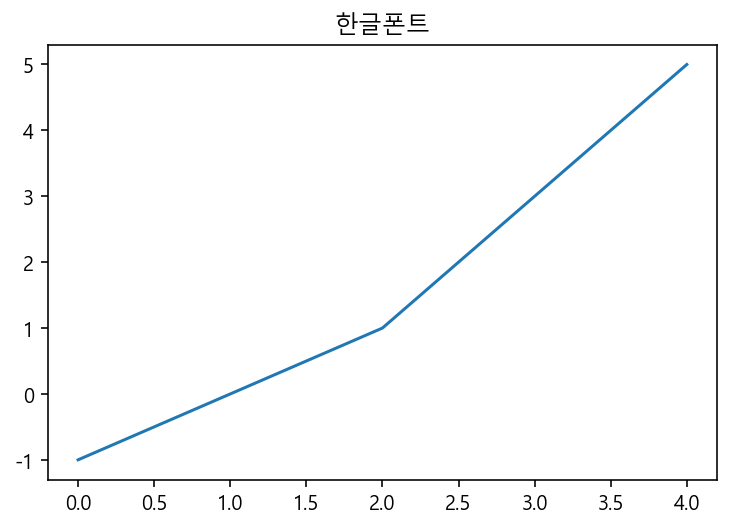

In [4]:
#한글폰트와 마이너스 폰트 설정 확인
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

## 데이터 불러오기

In [5]:
%ls C:\Users\pmj35\Documents\project

 C 드라이브의 볼륨: Acer
 볼륨 일련 번호: 1CC4-4493

 C:\Users\pmj35\Documents\project 디렉터리

2021-02-12  오전 10:55    <DIR>          .
2021-02-12  오전 10:55    <DIR>          ..
2021-02-11  오전 10:43    <DIR>          .ipynb_checkpoints
2021-01-31  오후 09:21         2,143,772 apartment.ipynb
2021-02-12  오전 10:55         1,192,598 coffee.ipynb
2021-02-10  오후 06:55         9,687,774 franchise.ipynb
2021-02-10  오후 06:55         1,110,377 heatmap.html
2021-02-10  오후 07:00             3,441 index.html
2021-02-12  오전 10:15    <DIR>          open-data-analysis-basic-master
2021-02-10  오후 06:42         1,085,776 paris-TousLesJours-index.html
2021-02-10  오후 05:48        77,085,147 seoul_open_store.csv
2021-02-10  오후 07:01         5,853,302 store.ipynb
2021-02-01  오후 10:33       264,920,940 상가업소정보_201912_01.csv
2020-12-26  오후 08:50             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-12-26  오후 08:50           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
              11개 파일         363,247,800 바이트
        

In [6]:
# 파일 불러와 df 변수에 담기
df=pd.read_csv("상가업소정보_201912_01.csv", sep="|")
df.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19905471  와라와라호프  NaN         Q       음식       Q09     유흥주점    Q09A01   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
0    호프/맥주   I56219  ...  1168010600106040000014378  대치상가   

                  도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280  6280.0  NaN   1  NaN  127.061026  37.493922  

[1 rows x 39 columns]

### 데이터 미리보기

In [7]:
df.shape

(573680, 39)

### info 보기

In [8]:
# info를 사용해서 데이터 사이즈, 타입, 메모리 사용량 등의 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<AxesSubplot:>

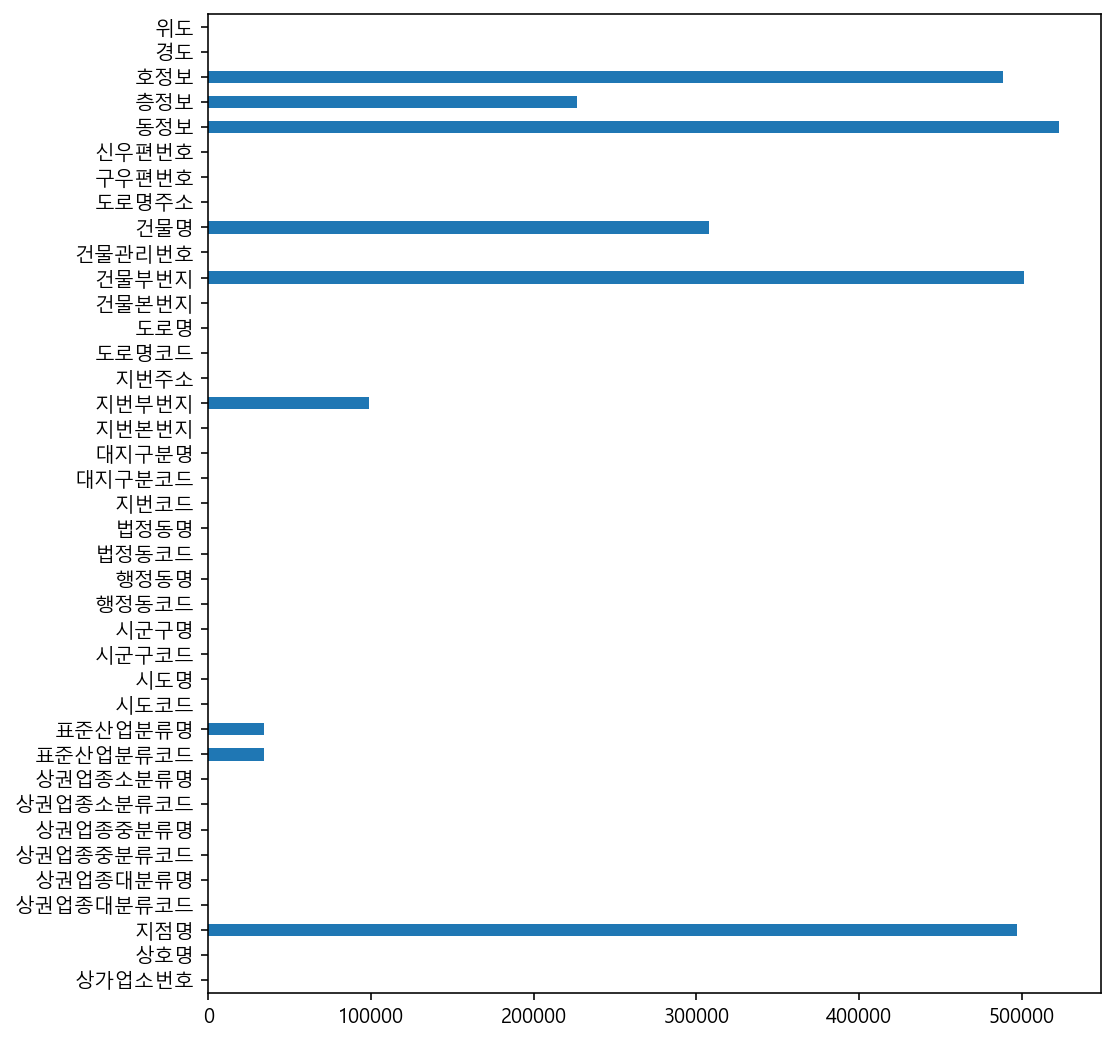

In [9]:
# isnull()을 사용해서 결측치 보기.
# 결측치는 True, 값이 있는 경우는 False로 표시. True는 1이기 때문에
# True값을 sum()하면 결측치 갯수를 알 수 있음.
df.isnull().sum().plot.barh(figsize=(8, 9))

### 사용하지 않는 컬럼 제거

In [10]:
# 사용할 컬럼만 따로 모아보기
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df=df[columns].copy()
df.shape

(573680, 11)

In [11]:
# 컬럼 제거 후 메모리 사용량 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기

### 서울만 따로 보기

In [12]:
# 시도명이 서울로 시작하는 데이터만 보기
# 이를 df_seoul 이라는 변수에 저장
# 새로운 변수에 데이터프레임을 할당할 때, copy()를 사용할 것
df_seoul=df[df["시도명"]=="서울특별시"].copy()

In [13]:
df_seoul.shape

(407376, 11)

### 일부 텍스트가 들어가는 데이터만 가져오기
* 상호명에서 브랜드명 추출
* 대소문자가 섞여 있을 수 있기 때문에 대소문자 변환
* 오타 방지를 위해 스타벅스 영문명은 STARBUCKS, 이디야는 EDIYA라고 지정
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

In [14]:
# 문자열 소문자로 바꾸는 메소드 사용
df_seoul["상호명_소문자"]=df_seoul["상호명"].str.lower()

In [15]:
# "상호명_소문자"컬럼으로 지정하고 '이디아|ediya' 갯수 세기
# .loc[행], .loc[행, 열]
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"),
         "상호명_소문자"].shape

(543,)

In [16]:
# 상호명에서 스타벅스만 가져오기
# 상호명은 소문자로 변경해 준 컬럼을 사용
# 스타벅스|starbucks의 "상호명_소문자"로 갯수 세기

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"), 
             "상호명_소문자"].shape

(506,)

In [17]:
# "상호명_소문자"컬럼으로 '스타벅스|starbucks"이디야|이디아|ediya'를 가져와서
# df_cafe 변수에 담기
df_cafe=df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks|이디야|이디아|ediya")].copy()
df_cafe

상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명  시군구명         행정동명  \
1104         스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   용산구        이태원1동   
1675        이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시  영등포구         신길1동   
2023    스타벅스종로3가점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구  종로1.2.3.4가동   
2770         스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   서초구          잠원동   
2957        이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시   구로구         구로3동   
...           ...      ...      ...          ...    ...   ...          ...   
567090       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   관악구         낙성대동   
567828       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   성동구        금호4가동   
568636      이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시   서초구         양재1동   
570096       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서대문구         북아현동   
571052       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서대문구        북가좌2동   

         법정동명                    도로명주소          경도         위도    상호명_소문자  
1104     이태원동       서울특별시 용산구 이태원로 188  126.994781  37.534303       스타벅스  
1675      신길동      서울특별시 영등포구 영등포로 353  126.918062  37.515118      이디야커피  
2023     종로3가       서울특별시 종로구 종로 113-1  126.990207  37.570585  스타벅스종로3가점  
2770      잠원동       서울특별시 서초구 강남대로 581  127.019763  37.513663       스타벅스  
2957      구로동     서울특별시 구로구 디지털로32길 43  126.897870  37.484385      이디야커피  
...       ...                      ...         ...        ...        ...  
567090    봉천동        서울특별시 관악구 관악로 158  126.952792  37.479298       스타벅스  
567828  금호동4가         서울특별시 성동구 동호로 99  127.015329  37.548028       스타벅스  
568636    우면동        서울특별시 서초구 바우뫼로 20  127.025274  37.469980      이디야커피  
570096   북아현동       서울특별시 서대문구 북아현로 29  126.956144  37.560080       스타벅스  
571052   북가좌동  서울특별시 서대문구 증가로29길 20-14  126.911859  37.582341       스타벅스  

[1049 rows x 12 columns]

In [18]:
# ~은 not을 의미. 스타벅스가 아닌 데이터는 이디야로 넣을 수 있고
# 스타벅스 이외에 결측치 값에 이디야를 채우는 것도 가능
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"]="스타벅스"
df_cafe[["상호명_소문자", "브랜드명"]]

상호명_소문자  브랜드명
1104         스타벅스  스타벅스
1675        이디야커피   NaN
2023    스타벅스종로3가점  스타벅스
2770         스타벅스  스타벅스
2957        이디야커피   NaN
...           ...   ...
567090       스타벅스  스타벅스
567828       스타벅스  스타벅스
568636      이디야커피   NaN
570096       스타벅스  스타벅스
571052       스타벅스  스타벅스

[1049 rows x 2 columns]

In [19]:
# ~은 not을 의미. 스타벅스가 아닌 데이터는 이디야로 넣을 수 있고
# 스타벅스 이외에 결측치 값에 이디야를 채우는 것도 가능
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"]="이디야"
df_cafe[["상호명_소문자", "브랜드명"]]

상호명_소문자  브랜드명
1104         스타벅스  스타벅스
1675        이디야커피   이디야
2023    스타벅스종로3가점  스타벅스
2770         스타벅스  스타벅스
2957        이디야커피   이디야
...           ...   ...
567090       스타벅스  스타벅스
567828       스타벅스  스타벅스
568636      이디야커피   이디야
570096       스타벅스  스타벅스
571052       스타벅스  스타벅스

[1049 rows x 2 columns]

In [20]:
#df_cafe 에 담긴 상호명과 브랜드명 미리보기
df_cafe[["상호명_소문자", "브랜드명"]].tail()

상호명_소문자  브랜드명
567090    스타벅스  스타벅스
567828    스타벅스  스타벅스
568636   이디야커피   이디야
570096    스타벅스  스타벅스
571052    스타벅스  스타벅스

### 시각화

#### 분류별 countplot 그리기

<AxesSubplot:>

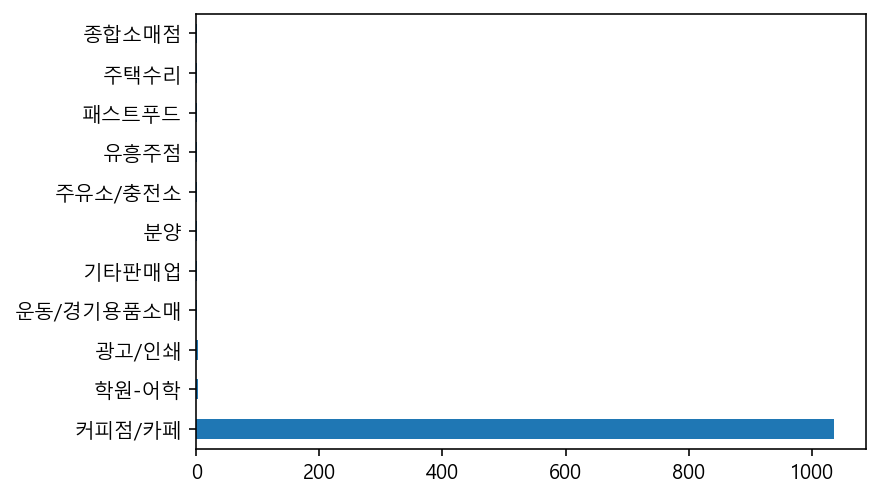

In [21]:
# "상권업종중분류명"을 countplot으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 확인
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [22]:
df_cafe=df_cafe[df_cafe["상권업종중분류명"]=="커피점/카페"].copy()
df_cafe["상권업종중분류명"].value_counts()

커피점/카페    1036
Name: 상권업종중분류명, dtype: int64

In [23]:
# 브랜드명으로 카페 갯수 세기
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

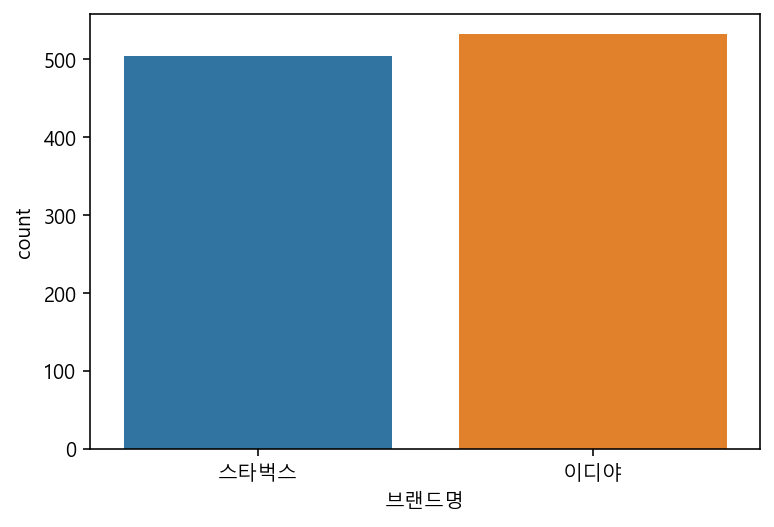

In [24]:
# 브랜드명을 막대그래프로 그리기
sns.countplot(data=df_cafe, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

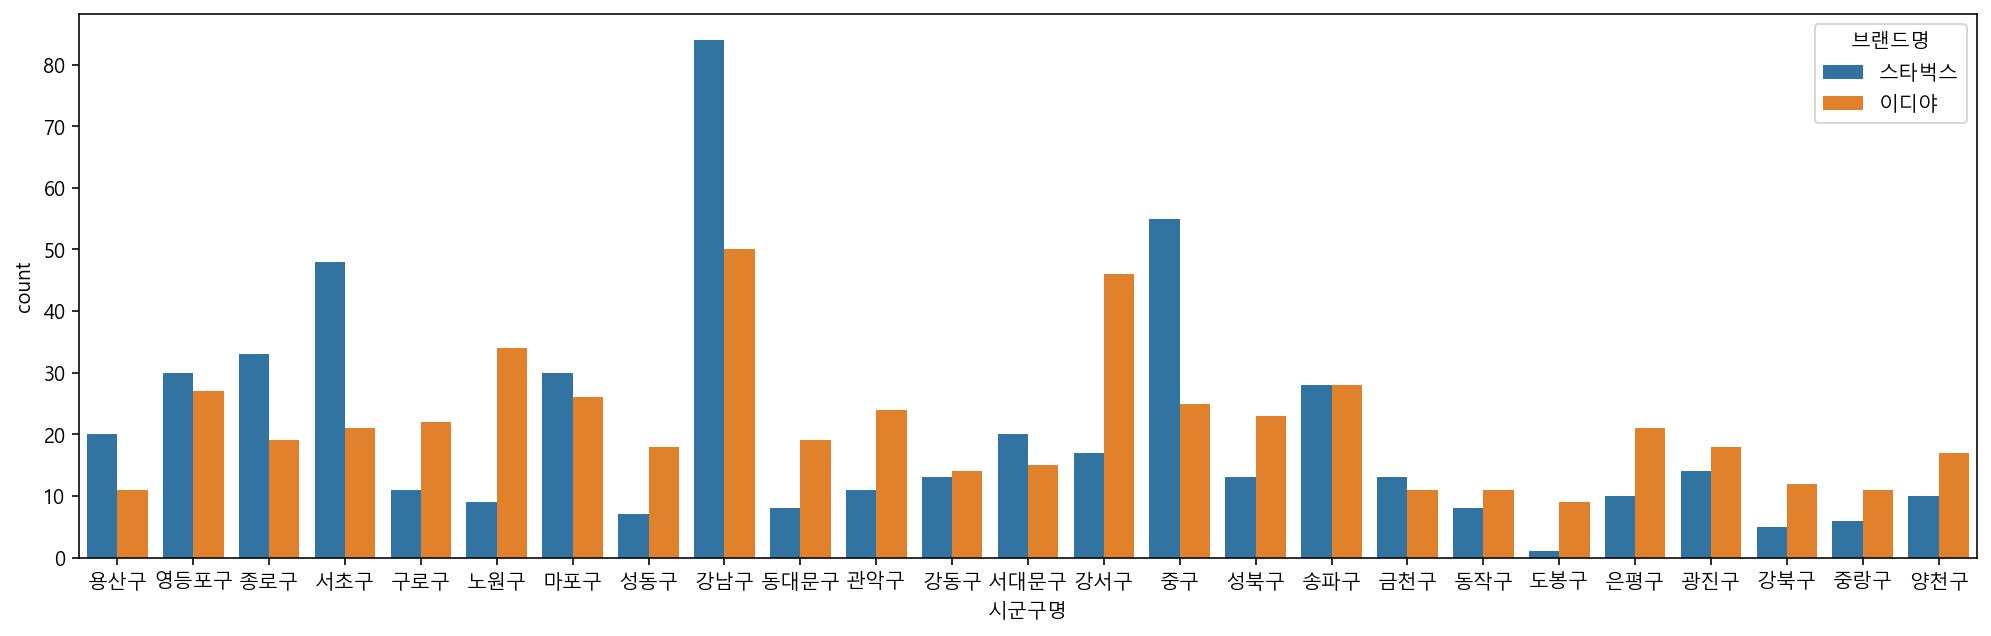

In [25]:
plt.figure(figsize=(17, 5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

#### scatterplot 그리기
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

<AxesSubplot:xlabel='경도', ylabel='위도'>

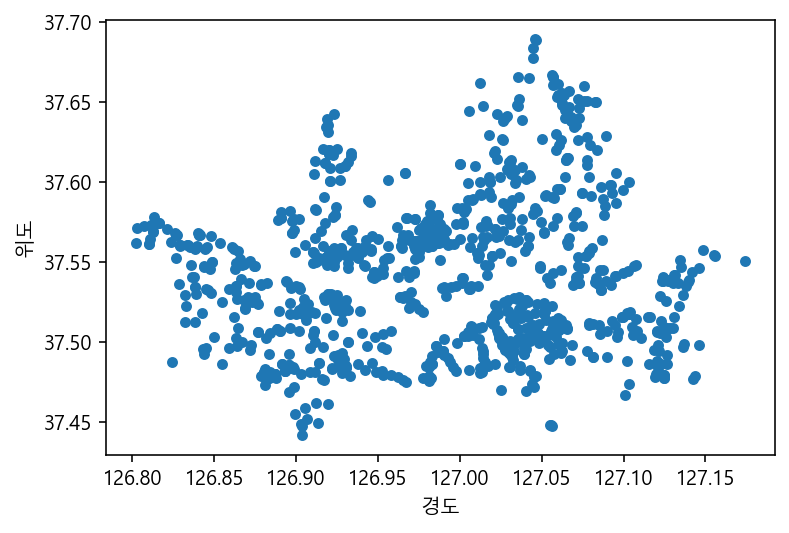

In [26]:
#pandas로 scatterplot 그리기
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

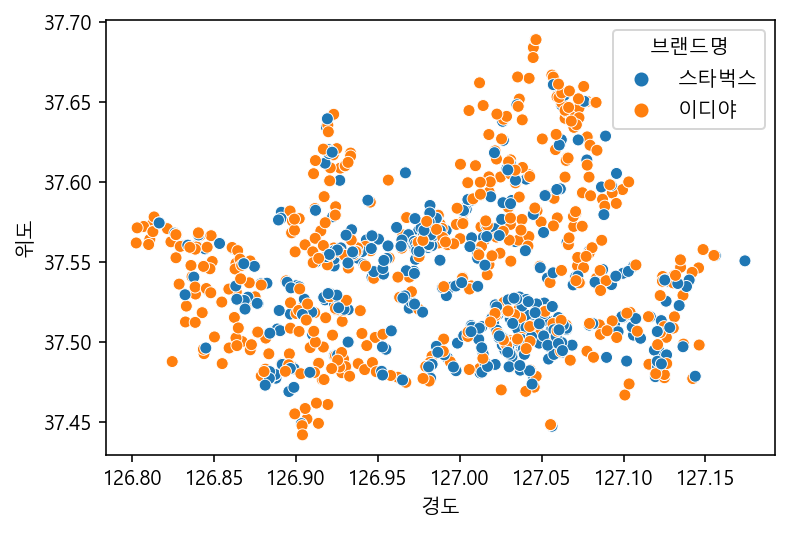

In [27]:
# seaborn의 scatterplot으로 시각화 하기. 단 hue는 브랜드명으로 지정
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

#### jointplot 그리기

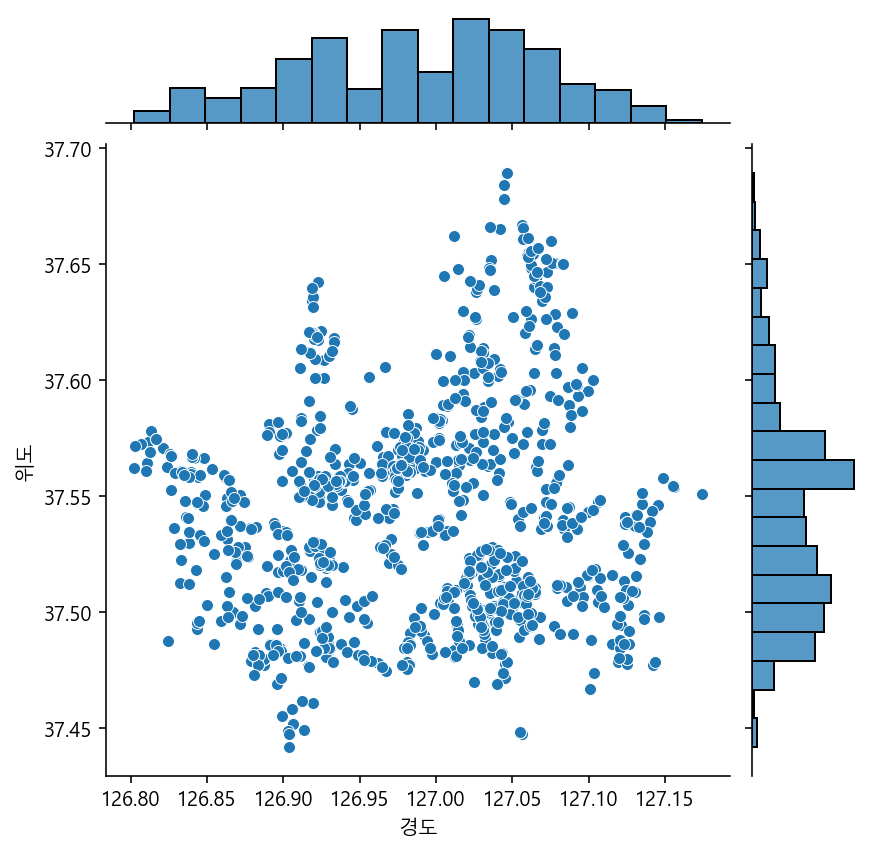

In [28]:
#jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도")

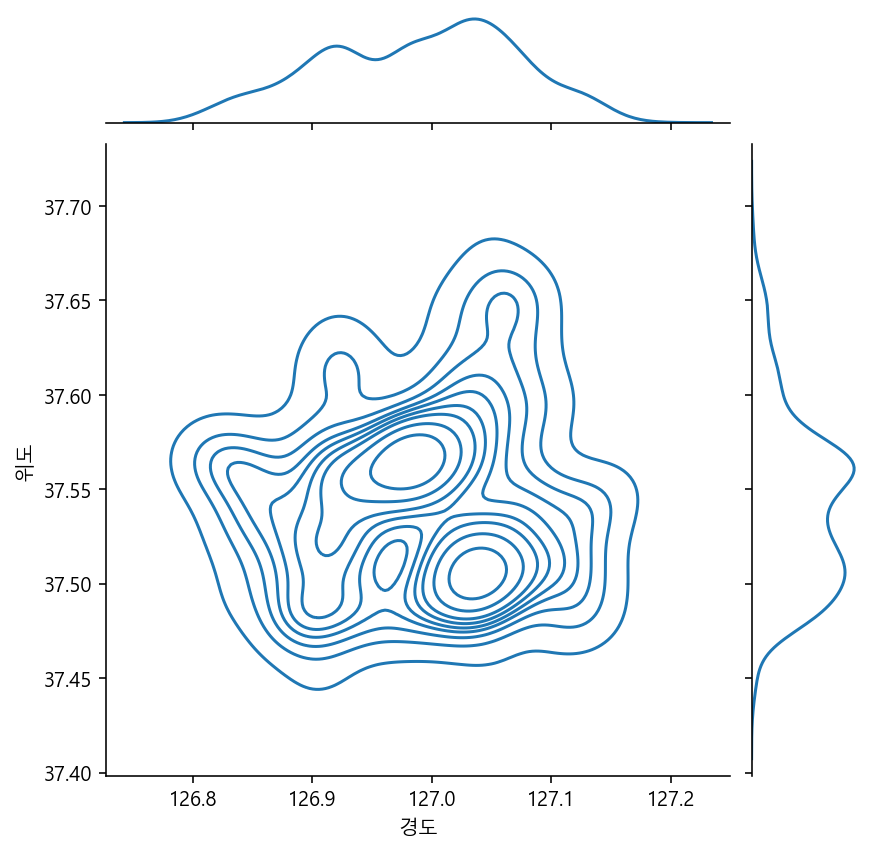

In [29]:
#jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

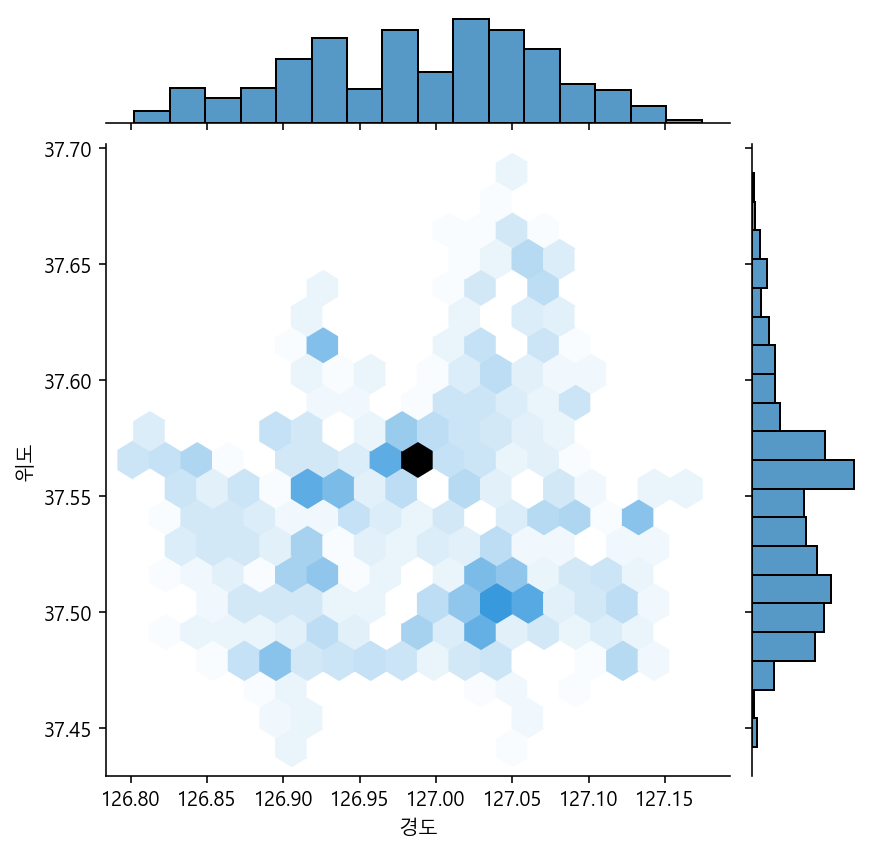

In [30]:
#jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="hex")

## 구별 브랜드 점포수

### groupby와 pivot_table로 구별 스타벅스, 이디야 매장 수 구하기`

#### groupby로 구별 매장 수 구하기

In [31]:
# 구별로 브랜드 점포수 구하기
# groupby를 사용하면 구별로 그룹화 하여 점포수를 구할 수 있음
# 그룹화 결과는 df_c_vs 변수에 담아서 재사용

# groupby로 구할 경우, 데이터를 시리즈 형태로 제공. 그래서 속도가 좀 더 빠름
# to_frame()이나 reset_index()를 통해 테이블 형태로 변경 가능.
df_c_vs=df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_c_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [32]:
#reset_index로 인덱스를 컬럼으로 변경
df_c_vs=df_c_vs.reset_index()
df_c_vs.head()

시군구명  브랜드명  상호명
0  강남구  스타벅스   84
1  강남구   이디야   50
2  강동구  스타벅스   13
3  강동구   이디야   14
4  강북구  스타벅스    5

In [33]:
# groupby "시군구명", "브랜드명"으로 갯수 세기
# 결과에 대한 데이터프레임 컬럼명을 ["구", "브랜드명", "매장수"]로 지정

df_c_vs.columns=["구", "브랜드명", "매장수"]
df_c_vs.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   50
2  강동구  스타벅스   13
3  강동구   이디야   14
4  강북구  스타벅스    5

#### pivot_table로 구별 매장 수 구하기

In [34]:
# 위와 동일한 결과를 pivot_table로 나타내기
# pivot_table은 데이터를 기본적으로 테이블 형태로 제공.
# groupby 보다 직관적
pivot=pd.pivot_table(data=df_cafe, index=["시군구명", "브랜드명"], values="상호명", 
              aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [35]:
# 특정 구 데이터만 가져오기
pivot.loc["강남구"]

상호명
브랜드명     
스타벅스   84
이디야    50

### 막대그래프로 시각화하기

In [36]:
df_c_vs.head

<bound method NDFrame.head of        구  브랜드명  매장수
0    강남구  스타벅스   84
1    강남구   이디야   50
2    강동구  스타벅스   13
3    강동구   이디야   14
4    강북구  스타벅스    5
5    강북구   이디야   12
6    강서구  스타벅스   17
7    강서구   이디야   46
8    관악구  스타벅스   11
9    관악구   이디야   24
10   광진구  스타벅스   14
11   광진구   이디야   18
12   구로구  스타벅스   11
13   구로구   이디야   22
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   34
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    8
23   동작구   이디야   11
24   마포구  스타벅스   30
25   마포구   이디야   26
26  서대문구  스타벅스   20
27  서대문구   이디야   15
28   서초구  스타벅스   48
29   서초구   이디야   21
30   성동구  스타벅스    7
31   성동구   이디야   18
32   성북구  스타벅스   13
33   성북구   이디야   23
34   송파구  스타벅스   28
35   송파구   이디야   28
36   양천구  스타벅스   10
37   양천구   이디야   17
38  영등포구  스타벅스   30
39  영등포구   이디야   27
40   용산구  스타벅스   20
41   용산구   이디야   11
42   은평구  스타벅스   10
43   은평구   이디야   21
44   종로구  스타벅스   33
45   종로구   이디야   19
46    중구  스타벅스   55
47    중구  

<AxesSubplot:xlabel='구', ylabel='매장수'>

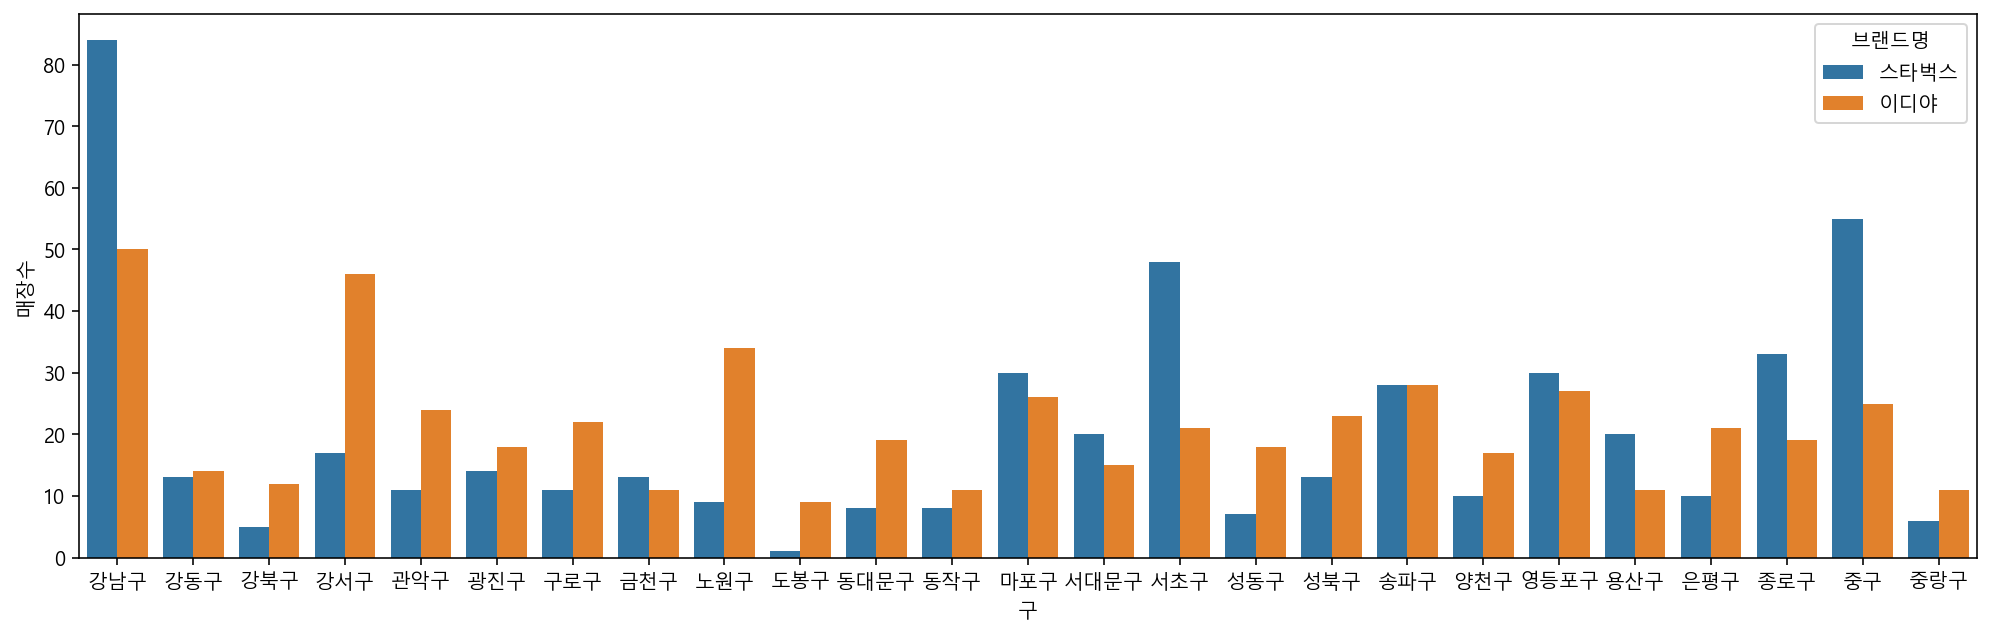

In [37]:
# seaborn의 barplot 을 활용해 구별 매장수 시각화하기
plt.figure(figsize=(17, 5))
sns.barplot(data=df_c_vs, x="구", y="매장수", hue="브랜드명")

* 브랜드명 컬럼으로 만들기
* unstack 이해하기 : https://pandas.pydata.org/docs/user_guide/reshaping.html

<AxesSubplot:xlabel='시군구명,브랜드명'>

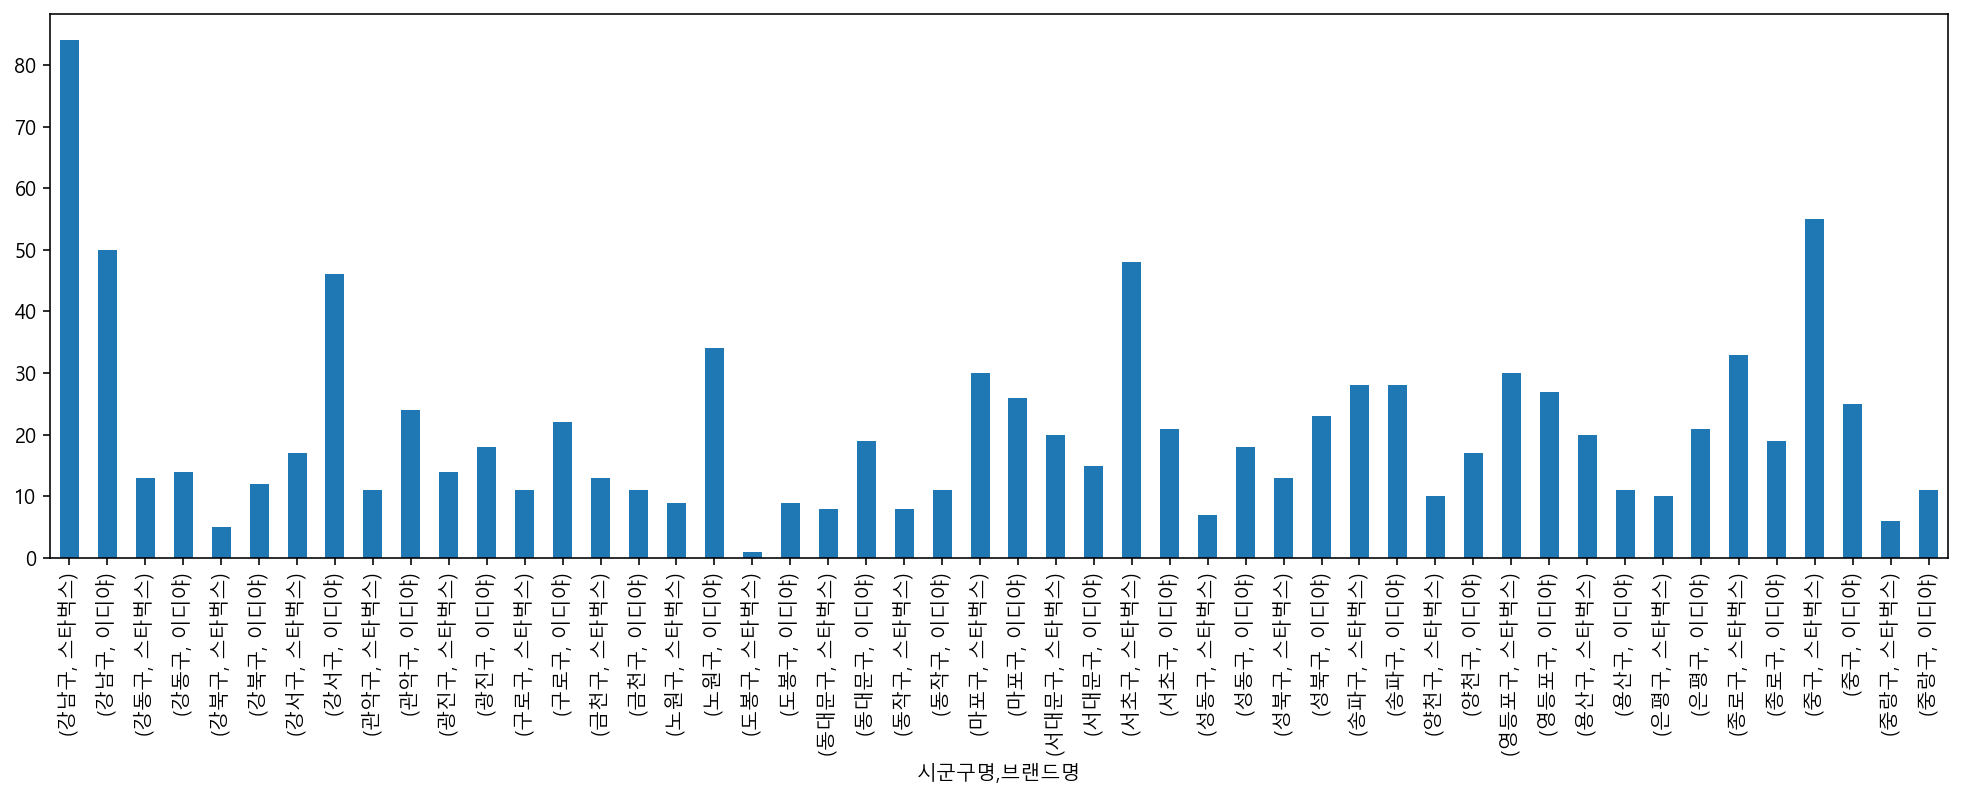

In [38]:
# groupby로 "시군구명", "브랜드명"으로 그룹화 하고 "상호명" 갯수세기
# 갯수 셀 때, count 사용
group=df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
group.plot.bar(figsize=(17, 5))

<AxesSubplot:xlabel='시군구명'>

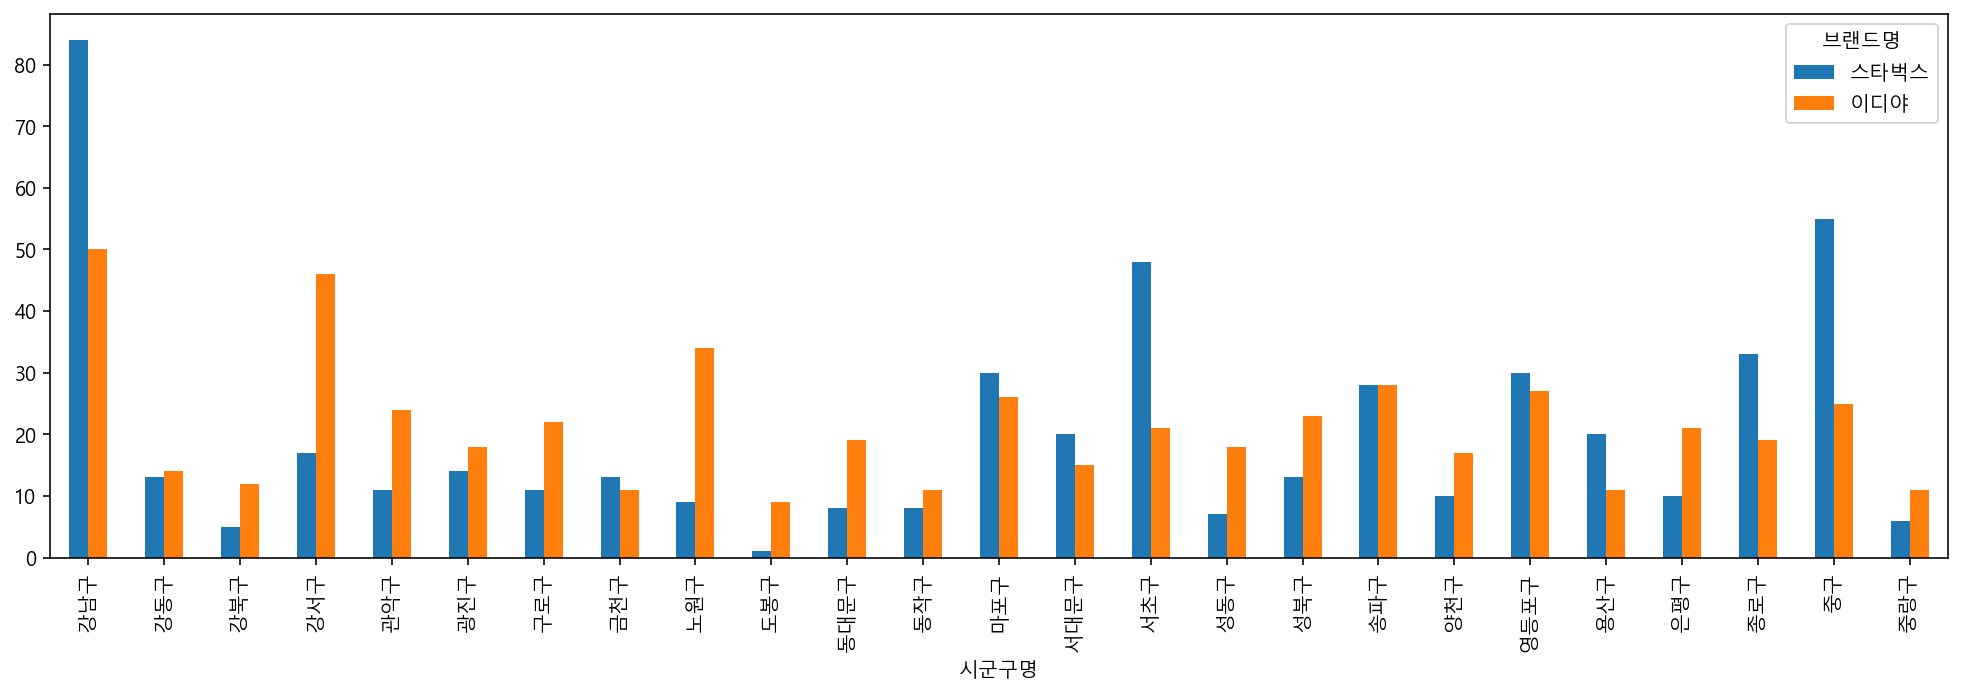

In [39]:
# groupby로 데이터를 집계한 결과를 시각화 하기
group.unstack().plot.bar(figsize=(17, 5))

<AxesSubplot:xlabel='시군구명'>

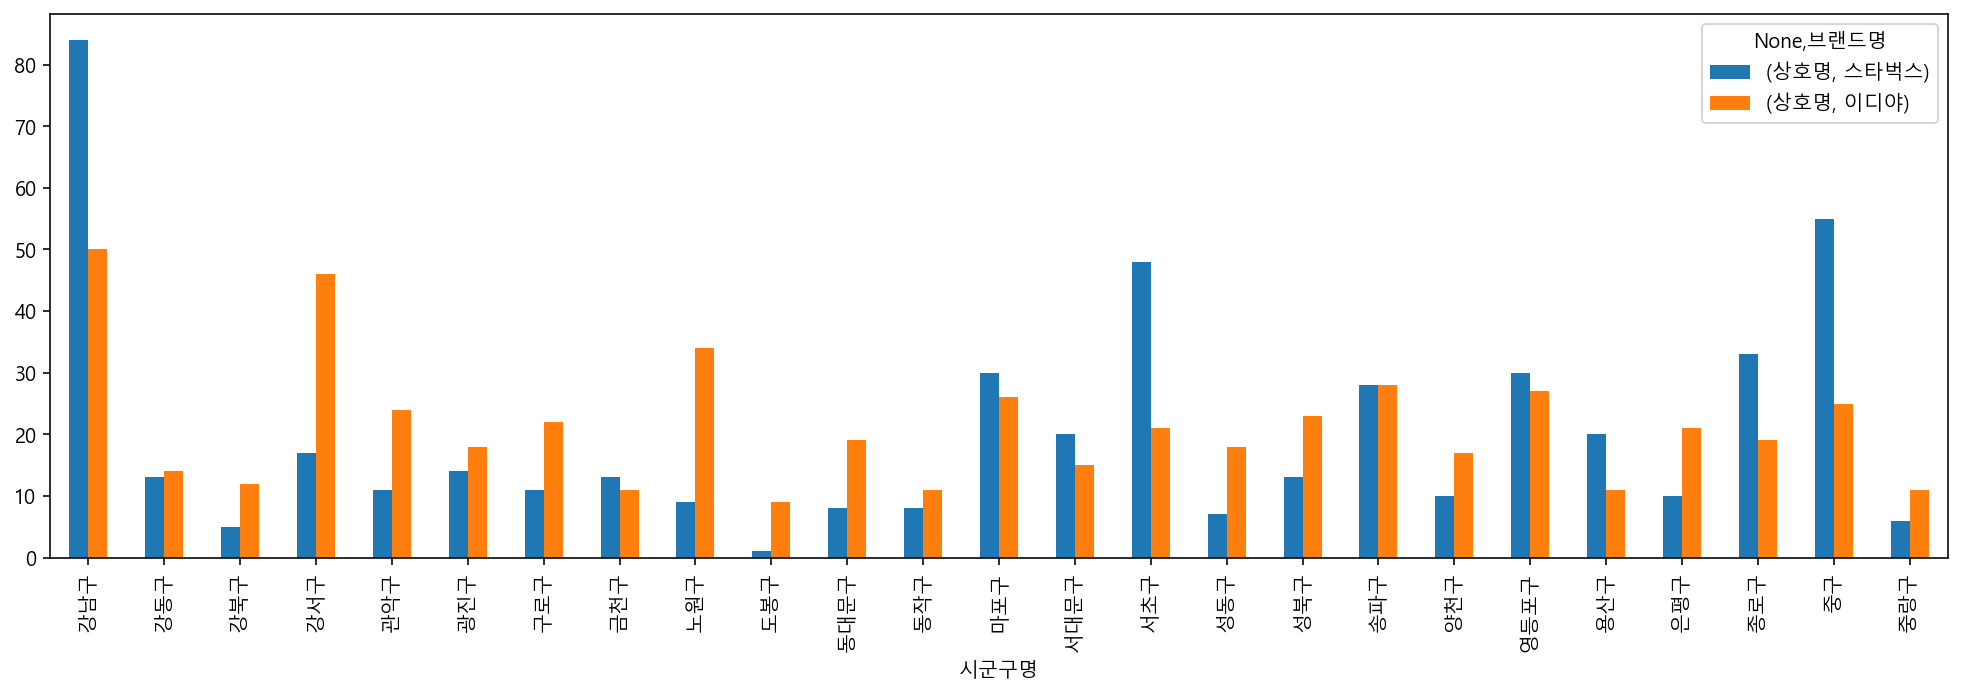

In [40]:
# pivot_table을 이용해서 구별 스타벅스, 이디야 매장수 구하기
pivot.unstack().plot.bar(figsize=(17, 5))

In [41]:
# pivot_table을 이용해서 구별 스타벅스, 이디야 매장수 구하기
pivot=pd.pivot_table(data=df_cafe, index="시군구명", 
               columns="브랜드명", 
               values="상호명", 
               aggfunc="count")

<AxesSubplot:xlabel='시군구명'>

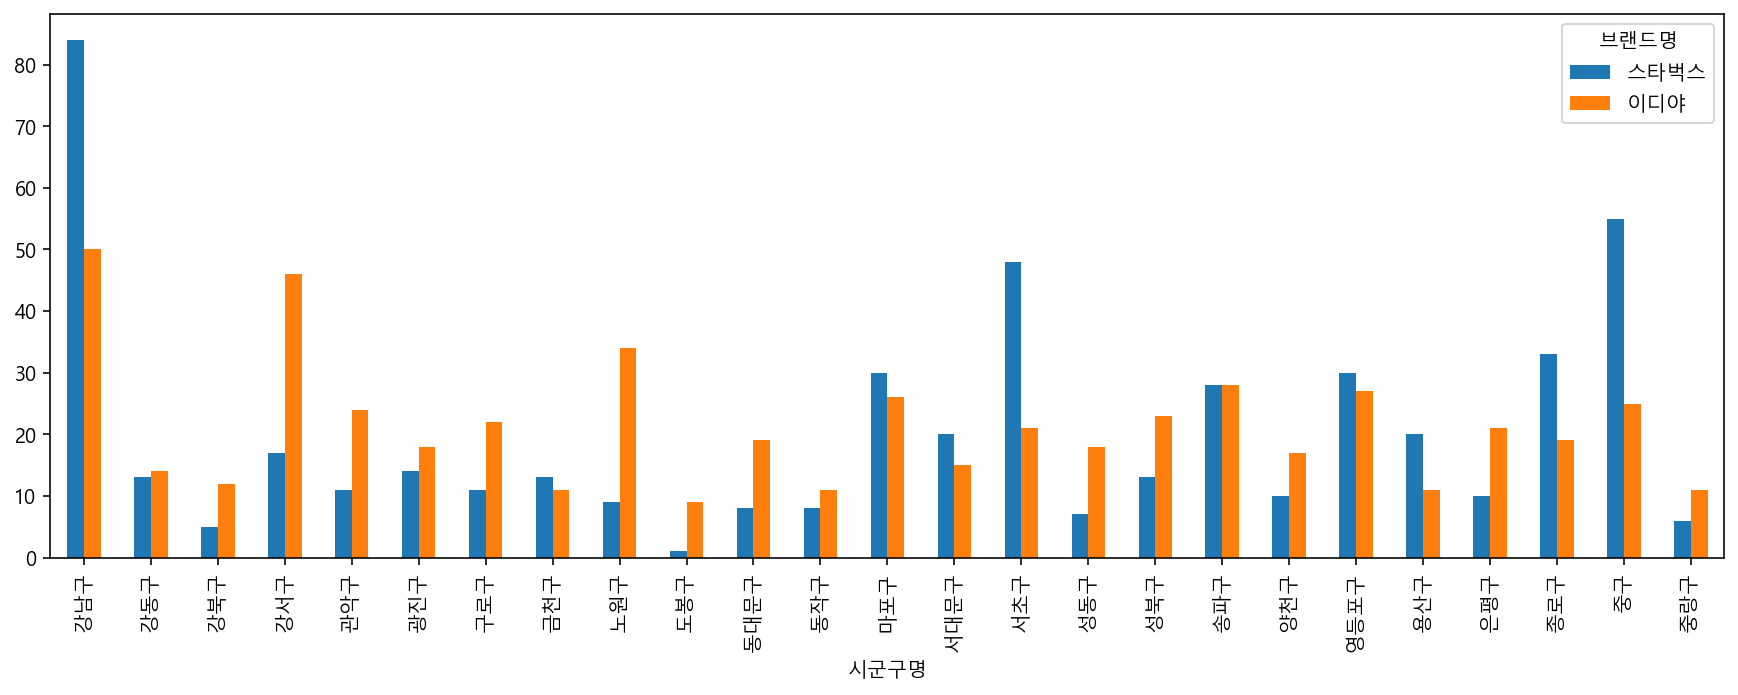

In [42]:
# pivot_table로 구한 결과를 plot.bar()를 통해 시각화
pivot.plot.bar(figsize=(15, 5))

<AxesSubplot:xlabel='시군구명', ylabel='count'>

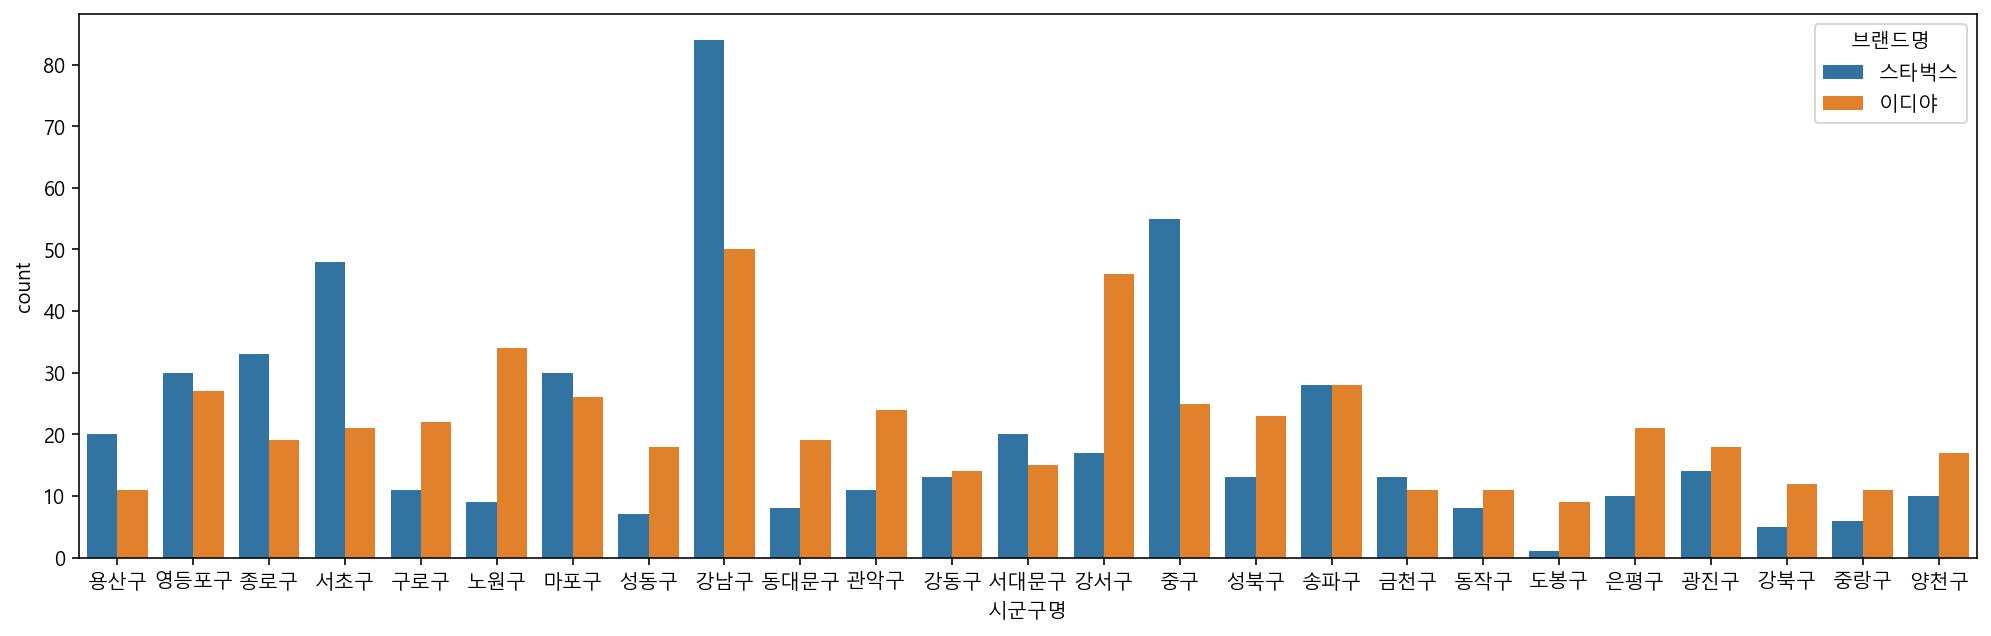

In [43]:
# pandas로 시각화 하는 방법 외에 seaborn의 countplot을 사용해 해당 컬럼수를 계산해서 시각화
# hue 옵션을 사용해서 값에 따라 다른 색상으로 그리기
# hue 옵션을 사용할 때, 데이터 카테고리 수는 2~3개 정도가 적합
# 현재 데이터에서는 브랜드명에 따라 색상을 다르게 표현
plt.figure(figsize=(17, 5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

## Folium으로 지도 활용하기

In [44]:
import folium

In [47]:
# 지도 중심 지정하기 위해 위도와 경도 평균 구하기
lat=df_cafe["위도"].mean()
long=df_cafe["경도"].mean()
lat, long

(37.5429213982126, 126.9887885123524)

### 스타벅스 이디야 카페 매장 전체 분포
* 스타벅스와 이디야 매장을 Marker와 CircleMarker로 지도에 표시

In [56]:
m=folium.Map([lat, long])

for i in df_cafe.index:
    sub_lat=df_cafe.loc[i, "위도"]
    sub_long=df_cafe.loc[i, "경도"]
#    title=df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"]
# f 포맷팅으로 텍스트 결합하기. f + 전체 문장 ""안에 담기
# 그리고 변수의 경우 {}로 한번도 묶기. 
    title=f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    folium.Marker([sub_lat, sub_long], tooltip=title).add_to(m)

m

In [59]:
m=folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")

for i in df_cafe.index:
    sub_lat=df_cafe.loc[i, "위도"]
    sub_long=df_cafe.loc[i, "경도"]
#    title=df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"]
# f 포맷팅으로 텍스트 결합하기. f + 전체 문장 ""안에 담기
# 그리고 변수의 경우 {}로 한번도 묶기. 
    title=f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"]=="이디야":
        color="red"

    folium.CircleMarker([sub_lat, sub_long],
                        radius=3, color=color,
                        tooltip=title).add_to(m)

m

### choropleth를 위한 GeoJSON 파일로드

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5
    
* Choropleth-maps : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb#Choropleth-maps

In [68]:
# 서울 행정구역 경계를 GeoJSON으로 표현한 파일
# 이 파일을 이용하여 구별 스타벅스와 이디야 매장수 표시
geo_path='seoul_municipalities_geo_simple.json'

import json
geo_json=json.load(open(geo_path, encoding="utf-8"))
geo_json["features"][0]["properties"]["name"]

'강동구'

### 스타벅스 매장 분포

In [83]:
# df_c_vs 변수에 담긴 값을 통해 스타벅스 매장수 확인
# "브랜드명"컬럼으로 스타벅스만 가져오기
# df_c_vs에는 위도, 경도 값 대신 구 컬럼이 있음.
# "구" 컬럼과 json 파일의 "구"명을 매칭하여 행정구역으로 지정 
df_star=df_c_vs[df_c_vs["브랜드명"]=="스타벅스"].copy()
df_star

구  브랜드명  매장수
0    강남구  스타벅스   84
2    강동구  스타벅스   13
4    강북구  스타벅스    5
6    강서구  스타벅스   17
8    관악구  스타벅스   11
10   광진구  스타벅스   14
12   구로구  스타벅스   11
14   금천구  스타벅스   13
16   노원구  스타벅스    9
18   도봉구  스타벅스    1
20  동대문구  스타벅스    8
22   동작구  스타벅스    8
24   마포구  스타벅스   30
26  서대문구  스타벅스   20
28   서초구  스타벅스   48
30   성동구  스타벅스    7
32   성북구  스타벅스   13
34   송파구  스타벅스   28
36   양천구  스타벅스   10
38  영등포구  스타벅스   30
40   용산구  스타벅스   20
42   은평구  스타벅스   10
44   종로구  스타벅스   33
46    중구  스타벅스   55
48   중랑구  스타벅스    6

In [84]:
# geo_json에서 구 이름 가져오기
geo_json["features"][0]["properties"]["name"]

'강동구'

In [85]:
# df_c_star로 스타벅스 매장 수 구하기
# choropleth 색상은 fill_color="YIGn"을 사용
m=folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_star,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="스타벅스 매장수",).add_to(m)

m

In [85]:
# df_c_star로 스타벅스 매장 수 구하기
# choropleth 색상은 fill_color="YIGn"을 사용
m=folium.Map([lat, long], tiles="stamen toner")

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_star,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="스타벅스 매장수",).add_to(m)

m

### 이디야 매장 분포

In [89]:
# 이디야 매장수 구하기
# "브랜드명"컬럼에서 이디야만 가져오기
df_ediya=df_c_vs[df_c_vs["브랜드명"]=="이디야"].copy()
df_ediya.head()

구 브랜드명  매장수
1  강남구  이디야   50
3  강동구  이디야   14
5  강북구  이디야   12
7  강서구  이디야   46
9  관악구  이디야   24

In [97]:
m=folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_ediya,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="RdPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="이디야 매장수",).add_to(m)

m

In [96]:
m=folium.Map([lat, long], tiles="stamen toner")

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_ediya,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="RdPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="이디야 매장수",).add_to(m)

for i in df_cafe.index:
    sub_lat=df_cafe.loc[i, "위도"]
    sub_long=df_cafe.loc[i, "경도"]
#    title=df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"]
# f 포맷팅으로 텍스트 결합하기. f + 전체 문장 ""안에 담기
# 그리고 변수의 경우 {}로 한번도 묶기. 
    title=f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"]=="이디야":
        color="red"

    folium.CircleMarker([sub_lat, sub_long],
                        radius=3, color=color,
                        tooltip=title).add_to(m)

m

### 매장수 크기를 반영해 CircleMarker  그리기
* Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [106]:
df_vs=df_c_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"]=df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs

브랜드명  스타벅스  이디야  매장수비교
구                     
강남구     84   50   True
강동구     13   14  False
강북구      5   12  False
강서구     17   46  False
관악구     11   24  False
광진구     14   18  False
구로구     11   22  False
금천구     13   11   True
노원구      9   34  False
도봉구      1    9  False
동대문구     8   19  False
동작구      8   11  False
마포구     30   26   True
서대문구    20   15   True
서초구     48   21   True
성동구      7   18  False
성북구     13   23  False
송파구     28   28  False
양천구     10   17  False
영등포구    30   27   True
용산구     20   11   True
은평구     10   21  False
종로구     33   19   True
중구      55   25   True
중랑구      6   11  False

In [109]:
# 간단한 함수를 사용해서 스타벅스의 매장수가 이디야보다 많을 때 1을 출력하도록 설정
df_vs["매장수비교"]=df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명  스타벅스  이디야  매장수비교
구                     
강남구     84   50    1.0
강동구     13   14    0.0
강북구      5   12    0.0
강서구     17   46    0.0
관악구     11   24    0.0

In [112]:
# 구를 컬럼명으로 사용하기 위해 reset_index 설정
# 데이터 프레임을 df_vs에 저장
df_vs=df_vs.reset_index()
df_vs.head()

브랜드명  index    구  스타벅스  이디야  매장수비교
0         0  강남구    84   50    1.0
1         1  강동구    13   14    0.0
2         2  강북구     5   12    0.0
3         3  강서구    17   46    0.0
4         4  관악구    11   24    0.0

### choropleth로 매장수 많고 적음을 표현하기

In [113]:
# 스타벅스 매장 수 구하기
# choropleth 색상은 fill_color="BuGn" 사용
# CircleMarjer의 radius 지정시 int 타입은 타입 오류가 남.
# TypeError: Object of type 'int64' is not JSON serializable
# 그래서 float type으로 지정
m=folium.Map([lat, long], tiles="stamen toner")

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_vs,
    columns=["구", "매장수비교"],
    key_on="feature.properties.name",
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="매장수비교",).add_to(m)

for i in df_vs.index:

m

In [119]:
df_gu_M=df_cafe.pivot_table(index="시군구명")
df_gu_M=df_gu_M.reset_index()
df_gu_M.head()

시군구명          경도         위도
0  강남구  127.046129  37.505744
1  강동구  127.135417  37.540316
2  강북구  127.022897  37.631146
3  강서구  126.837883  37.555966
4  관악구  126.935210  37.482054

In [121]:
df_vs=df_vs.merge(df_gu_M, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

index    구  스타벅스  이디야  매장수비교 시군구명          경도         위도
0      0  강남구    84   50    1.0  강남구  127.046129  37.505744
1      1  강동구    13   14    0.0  강동구  127.135417  37.540316
2      2  강북구     5   12    0.0  강북구  127.022897  37.631146
3      3  강서구    17   46    0.0  강서구  126.837883  37.555966
4      4  관악구    11   24    0.0  관악구  126.935210  37.482054

In [122]:


for i in df_vs.index:
    sub_long=df_vs.loc[i, "경도"]
    sub_lat=df_vs.loc[i, "위도"]
    print(df_vs.loc[i, "구"], sub_lat, sub_long)


강남구 37.50574379723647 127.04612924851477
강동구 37.54031612892801 127.13541705768304
강북구 37.63114579912596 127.02289728220342
강서구 37.555966339807725 126.8378831992901
관악구 37.482054429288624 126.93521011850088
광진구 37.54376971811047 127.08329747837426
구로구 37.494060747742985 126.87745596750014
금천구 37.469286927652114 126.8921962213389
노원구 37.6423933051354 127.06717137772726
도봉구 37.66576544822702 127.04047354226732
동대문구 37.580700635471146 127.05492813212528
동작구 37.49570035386574 126.94890217041826
마포구 37.55548154197544 126.92300493503947
서대문구 37.566284229288875 126.93762476470604
서초구 37.49301091104672 127.01402160112261
성동구 37.55457943854072 127.03635911128876
성북구 37.59886024576222 127.02565170180024
송파구 37.50117991460961 127.1141353230951
양천구 37.52891847594384 126.86196683493064
영등포구 37.520781009585264 126.91390000535677
용산구 37.53468952777027 126.98251254628539
은평구 37.61406806596294 126.92041650466946
종로구 37.57615434804085 126.98723628325011
중구 37.56289726978085 126.98657335073601
중랑구 37.5960

### 신문기사와 유사하게 매장수에 따라 원 크기를 다르게 그리기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Colormaps.ipynb

In [124]:
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        print(cafe)

스타벅스
이디야


In [143]:
m=folium.Map([lat, long], tiles="stamen toner", zoom_start=11)

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_vs,
    columns=["구", "매장수비교"],
    key_on="feature.properties.name",
    fill_color="BuGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="매장수비교",).add_to(m)


for i in df_vs.index:
    sub_long=df_vs.loc[i, "경도"]
    sub_lat=df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:  
        cafe_count=df_vs.loc[i, cafe]
        gu=df_vs.loc[i, "구"]
        tooltip=f"{gu} {cafe} : {cafe_count}"
        
        radius=np.sqrt(cafe_count) * 2
        
        color="blue"
        if cafe=="이디야":
            color="red"
            sub_long=sub_long + 0.01

        folium.CircleMarker([sub_lat, sub_long], 
                            radius=radius, 
                            color=color,
                            fill=True,
                            tooltip=tooltip,
                           ).add_to(m)

m

* 실습해볼만한 자료
* 카토그램
    * [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
    * [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)